In [1]:
!pip install MulticoreTSNE

  Created wheel for MulticoreTSNE: filename=MulticoreTSNE-0.1-cp36-cp36m-linux_x86_64.whl size=68502 sha256=80eb45b8984f62c5d771e4211ecb46b37830ddff1d1e7aef81e055b82f8bc37c
  Stored in directory: /root/.cache/pip/wheels/27/59/53/3b52ee63add3692254c30d687fa4dff4d128d0557861fb028e
Successfully built MulticoreTSNE


In [0]:
import requests
from bs4 import BeautifulSoup
import cv2
import pathlib
import numpy as np
from MulticoreTSNE import MulticoreTSNE as TSNE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

%matplotlib inline

#画像の取得

In [4]:
url = "http://killmebaby.tv/special_icon.html"

headers = {'User-Agent':'Mozilla/5.0'}
soup = BeautifulSoup(requests.get(url,headers=headers).content,'lxml')
images = [] # 画像リストの空配列
i,j = 0,0
for img in soup.find_all('img'):
  i+=1
  print(img.get("src"))
  images.append(img.get("src"))
  if i ==30:
    break

for target in images[8:-1]: # アイコンのpngのみを取得する
  j+=1
  re = requests.get(target)
  with open('./' + target.split('/')[-1], 'wb') as f:
      f.write(re.content)
  if j ==30:
    break

# スクレイピング終了確認
print("画像保存が完了しました。")

images/spacer.gif
images/cate_btm00_a.png
images/cate_btm01_a.png
images/cate_btm02_a.png
images/cate_btm03_a.png
images/cate_btm04_a.png
images/cate_btm05_a.png
images/icon/title.png
http://aka.saintpillia.com/killme/icon/01_001.png
http://aka.saintpillia.com/killme/icon/01_003.png
http://aka.saintpillia.com/killme/icon/01_005.png
http://aka.saintpillia.com/killme/icon/01_006.png
http://aka.saintpillia.com/killme/icon/01_008.png
http://aka.saintpillia.com/killme/icon/01_009.png
http://aka.saintpillia.com/killme/icon/01_011.png
http://aka.saintpillia.com/killme/icon/01_012.png
http://aka.saintpillia.com/killme/icon/01_015.png
http://aka.saintpillia.com/killme/icon/01_017.png
http://aka.saintpillia.com/killme/icon/01_019.png
http://aka.saintpillia.com/killme/icon/01_021.png
http://aka.saintpillia.com/killme/icon/01_022.png
http://aka.saintpillia.com/killme/icon/01_024.png
http://aka.saintpillia.com/killme/icon/01_025.png
http://aka.saintpillia.com/killme/icon/01_026.png
http://aka.saint

#openCVでナンパイに、１２８＊１２８＊３

In [5]:
pathlib.Path('./').glob('*.png')

<generator object Path.glob at 0x7f833aa9d410>

In [6]:
path = pathlib.Path('./').glob('*.png')
path_l = [p for p in path]
kills = np.concatenate([cv2.imread(str(p)).flatten().reshape(1,-1) for p in path_l], axis=0)
kills.shape

(24, 49152)

In [0]:
kills.shape

(686, 49152)

In [7]:
path_l

[PosixPath('01_032.png'),
 PosixPath('01_034.png'),
 PosixPath('01_012.png'),
 PosixPath('01_005.png'),
 PosixPath('01_035.png'),
 PosixPath('01_025.png'),
 PosixPath('01_011.png'),
 PosixPath('01_033.png'),
 PosixPath('01_008.png'),
 PosixPath('01_024.png'),
 PosixPath('01_001.png'),
 PosixPath('01_031.png'),
 PosixPath('01_009.png'),
 PosixPath('01_021.png'),
 PosixPath('01_006.png'),
 PosixPath('01_026.png'),
 PosixPath('01_027.png'),
 PosixPath('01_019.png'),
 PosixPath('01_015.png'),
 PosixPath('01_017.png'),
 PosixPath('01_003.png'),
 PosixPath('01_029.png'),
 PosixPath('01_037.png'),
 PosixPath('01_022.png')]

#ｔ－SNEの実行
perplexityとは分布の複雑性を表すパラメータです。原論文では5~50が推奨されています。\
⇒値を増やすとクラス数が増えるイメージ、バラバラにプロットされる

In [0]:
%%time
tsne = TSNE(n_jobs=4, perplexity=20) # 20が一番いい感じでした
kills_reduced = tsne.fit_transform(kills)

CPU times: user 44 s, sys: 158 ms, total: 44.2 s
Wall time: 23.5 s


#プロット


In [0]:
def imscatter(x, y, image_list, ax=None, zoom=1):
    if ax is None:
        ax = plt.gca()
    #全イメージをとってくるので要注意クラッシュするぞ
    im_list = [OffsetImage(plt.imread(str(p)), zoom=zoom) for p in image_list]
    x, y = np.atleast_1d(x, y)
    artists = []
    for x0, y0, im in zip(x, y, im_list):
        ab = AnnotationBbox(im, (x0, y0), xycoords='data', frameon=False)
        artists.append(ax.add_artist(ab))
    ax.update_datalim(np.column_stack([x, y]))
    ax.autoscale()
    return artists
#zoomを小さくすれば、リサイズしなくてもなんとかなる。
# perplexity: 20
fig, ax = plt.subplots(figsize=(30,30))
imscatter(kills_reduced[:,0], kills_reduced[:,1], path_l, ax=ax, zoom=0.4)

plt.show()

Output hidden; open in https://colab.research.google.com to view.

#PCA

In [16]:
kills_pca[:,0].shape

(24,)

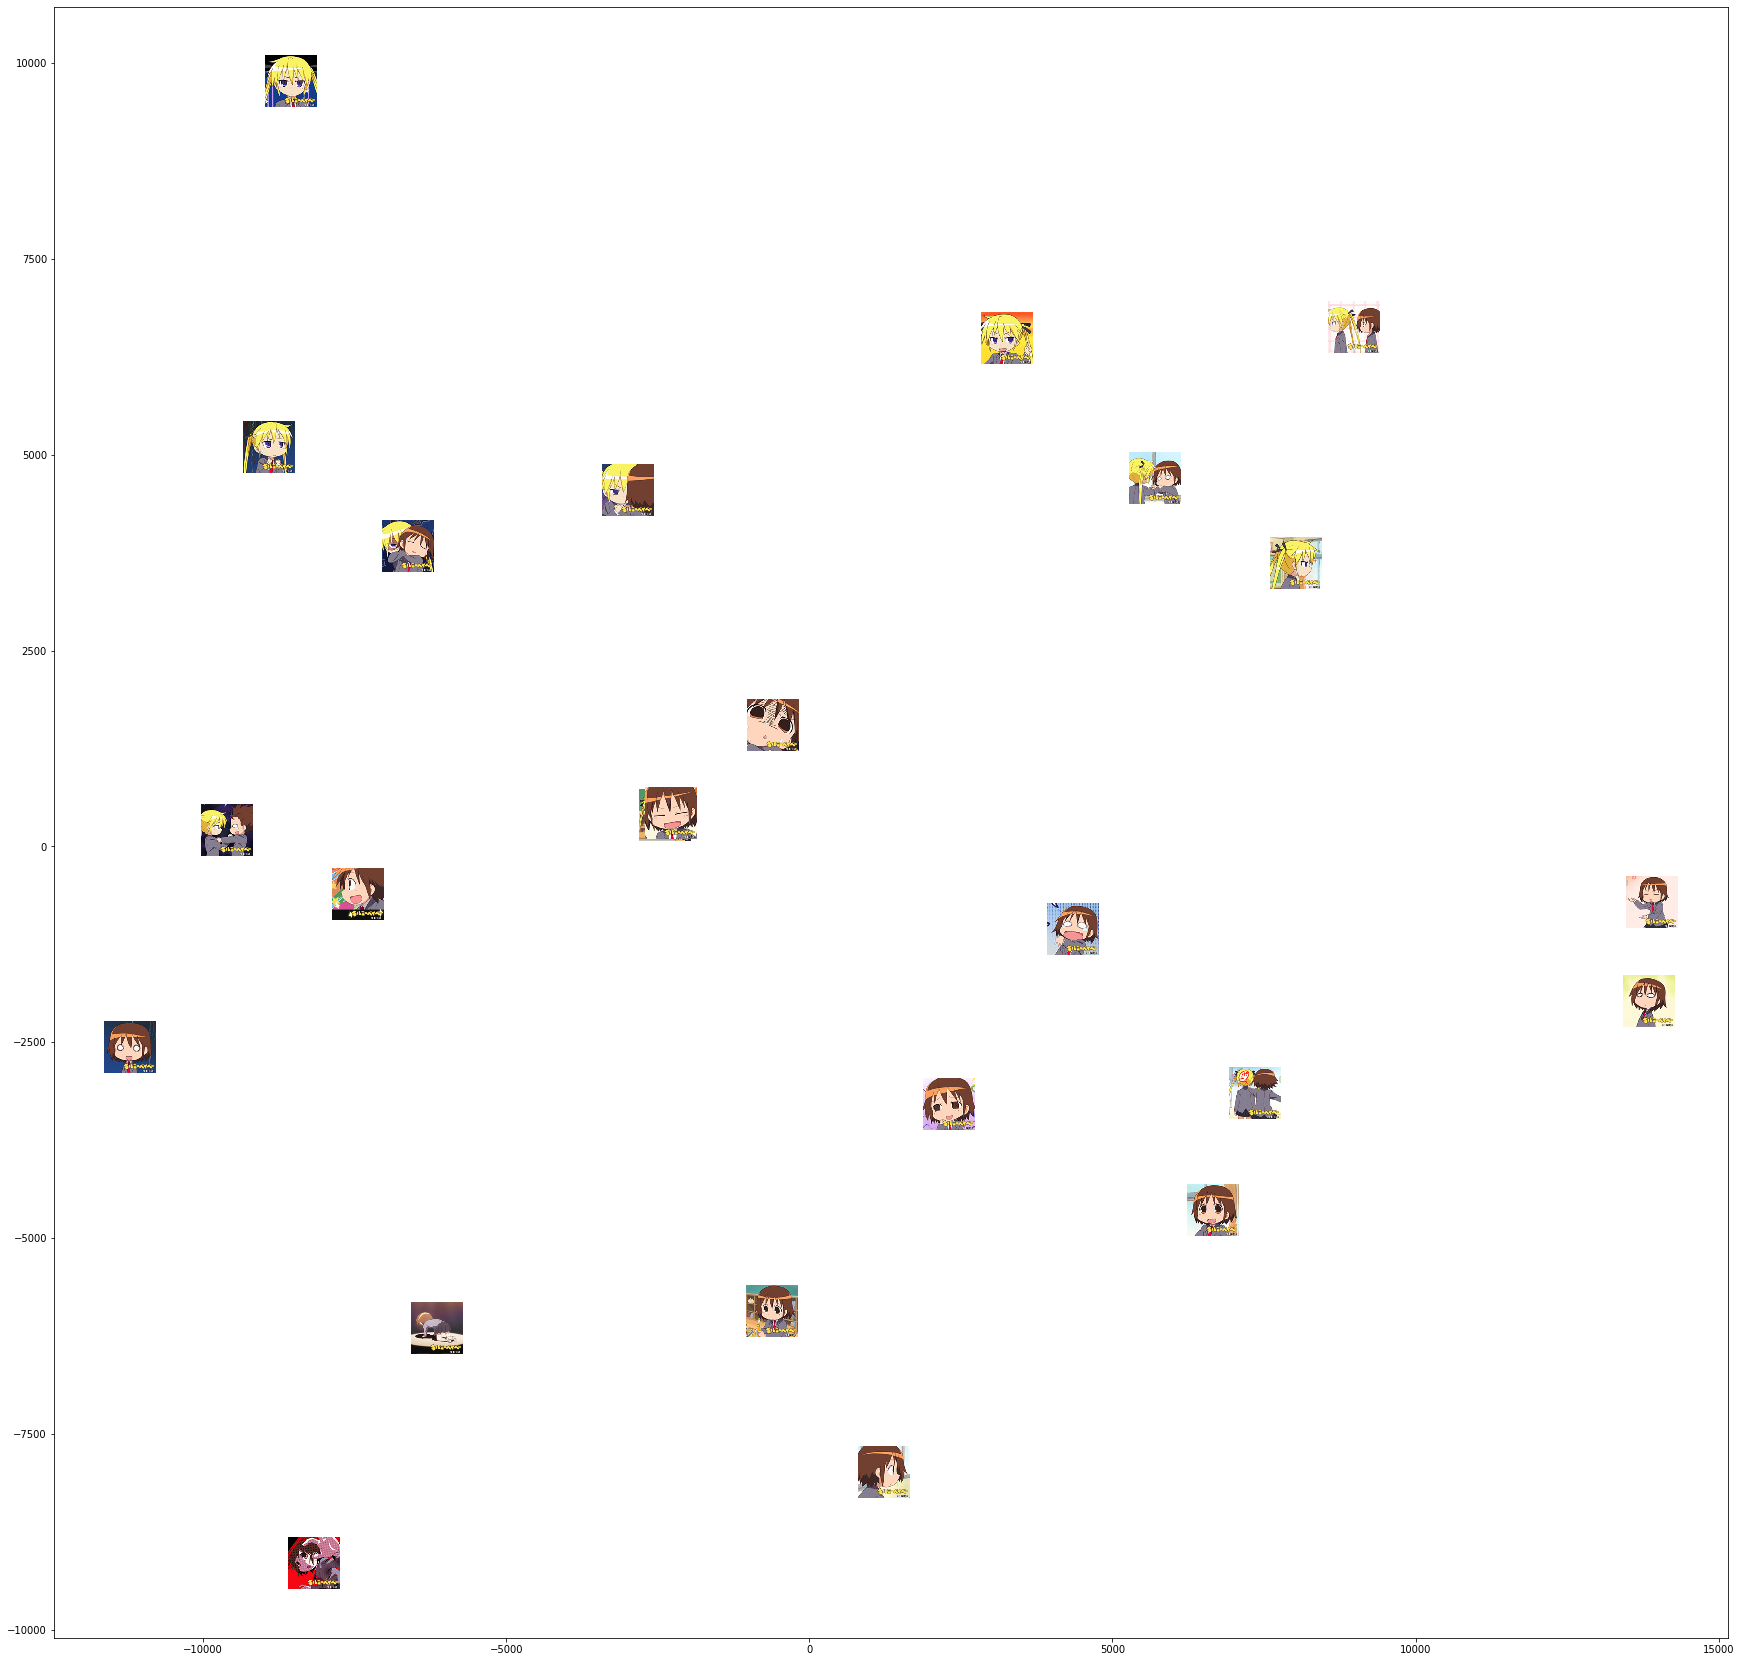

In [12]:
pca = PCA()
kills_pca = pca.fit_transform(kills)

fig, ax = plt.subplots(figsize=(30,30))
imscatter(kills_pca[:,0], kills_pca[:,1], path_l, ax=ax, zoom=0.4)

plt.show()